In [6]:
import numpy as np
import numpy.linalg as la
from scipy.sparse import diags
import matplotlib.pyplot as plt

def get_xs(base):
    inFile = base + 'DIFFCOEF.txt'
    with open(inFile, 'r') as i:
        data = i.readlines()
    lines = list()
    for line in data:
        lines.append(line.split())
    D = float(lines[0][1]), float(lines[0][2])

    inFile = base + 'REMXS.txt'
    with open(inFile, 'r') as i:
        data = i.readlines()
    lines = list()
    for line in data:
        lines.append(line.split())
    sr = float(lines[0][1]), float(lines[0][2])

    inFile = base + 'SP0.txt'
    with open(inFile, 'r') as i:
        data = i.readlines()
    lines = list()
    for line in data:
        lines.append(line.split())
    # sigmaS21, sigmaS12
    ss = float(lines[0][3]), float(lines[0][2])

    inFile = base + 'CHIT.txt'
    with open(inFile, 'r') as i:
        data = i.readlines()
    lines = list()
    for line in data:
        lines.append(line.split())
    chi = float(lines[0][1]), float(lines[0][2])

    inFile = base + 'NSF.txt'
    with open(inFile, 'r') as i:
        data = i.readlines()
    lines = list()
    for line in data:
        lines.append(line.split())
    nusf = float(lines[0][1]), float(lines[0][2])
    
    inFile = base + 'FLX.txt'
    with open(inFile, 'r') as i:
        data = i.readlines()
    lines = list()
    for line in data:
        lines.append(line.split())
    flux = float(lines[0][1]), float(lines[0][2])
    
    return D, sr, ss, chi, nusf, flux

In [108]:
base = '../xs/8/xs800000-500-100/htgr_2g_'
cD, csr, css, cchi, cnusf, cflux = get_xs(base + 'homoge_')
bD, bsr, bss, bchi, bnusf, bflux = get_xs(base + 'brefl_')
tD, tsr, tss, tchi, tnusf, tflux = get_xs(base + 'trefl_')

# Core
cD = (cflux[0]*cD[0]+cflux[1]*cD[1])/(cflux[0]+cflux[1])
csA = np.array([0, 0])
csA[0] = csr[0]-css[1]
csA[1] = csr[1]-css[0]
csA = (cflux[0]*csA[0]+cflux[1]*csA[1])/(cflux[0]+cflux[1])
cnsF = (cflux[0]*cnusf[0]+cflux[1]*cnusf[1])/(cflux[0]+cflux[1])

# Bottom
bD = (bflux[0]*bD[0]+bflux[1]*bD[1])/(bflux[0]+bflux[1])
bsA = np.array([0.0, 0.0])
bsA[0] = bsr[0]-bss[1]
bsA[1] = bsr[1]-bss[0]
bsA = (bflux[0]*bsA[0]+bflux[1]*bsA[1])/(bflux[0]+bflux[1])

# Top
tD = (tflux[0]*tD[0]+tflux[1]*tD[1])/(tflux[0]+tflux[1])
tsA = np.array([0.0, 0.0])
tsA[0] = tsr[0]-tss[1]
tsA[1] = tsr[1]-tss[0]
tsA = (tflux[0]*tsA[0]+tflux[1]*tsA[1])/(tflux[0]+tflux[1])

base = 'xs/htgr_2g_brefl_'
T = 750

f = open(base + 'REMXS.txt', "w+")  # this is actually absorption
f.write(str(750) + ' ' + str(bsA))
f.write('\n')
f.close()

f = open(base + 'NSF.txt', "w+")
f.write(str(750) + ' ' + str(0.0))
f.write('\n')
f.close()

f = open(base + 'DIFFCOEF.txt', "w+")
f.write(str(750) + ' ' + str(bD))
f.write('\n')
f.close()

f = open(base + 'CHIT.txt', "w+")
f.write(str(750) + ' ' + str(0.0))
f.write('\n')
f.close()

f = open(base + 'FISS.txt', "w+")
f.write(str(750) + ' ' + str(0.0))
f.write('\n')
f.close()

f = open(base + 'SP0.txt', "w+")
f.write(str(750) + ' ' + str(0.0))
f.write('\n')
f.close()

f = open(base + 'KAPPA.txt', "w+")
f.write(str(750) + ' ' + str(0.0))
f.write('\n')
f.close()

f = open(base + 'CHID.txt', "w+")
f.write(str(750) + ' ' + str(0.0))
f.write('\n')
f.close()

f = open(base + 'INVV.txt', "w+")
f.write(str(750) + ' ' + str(0.0))
f.write('\n')
f.close()

data = ['BETA_EFF', 'LAMBDA']
for param in data:
    f = open(base + param + '.txt', "w+")
    f.write(str(750))
    for i in range(8):
        f.write(' 0.0')
    f.write('\n')
    f.close()

base = 'xs/htgr_2g_homoge_'
T = 750

f = open(base + 'REMXS.txt', "w+")  # this is actually absorption
f.write(str(750) + ' ' + str(csA))
f.write('\n')
f.close()

f = open(base + 'NSF.txt', "w+")
f.write(str(750) + ' ' + str(cnsF))
f.write('\n')
f.close()

f = open(base + 'DIFFCOEF.txt', "w+")
f.write(str(750) + ' ' + str(cD))
f.write('\n')
f.close()

f = open(base + 'CHIT.txt', "w+")
f.write(str(750) + ' ' + str(1.0))
f.write('\n')
f.close()

f = open(base + 'FISS.txt', "w+")
f.write(str(750) + ' ' + str(0.0))
f.write('\n')
f.close()

f = open(base + 'SP0.txt', "w+")
f.write(str(750) + ' ' + str(0.0))
f.write('\n')
f.close()

f = open(base + 'KAPPA.txt', "w+")
f.write(str(750) + ' ' + str(0.0))
f.write('\n')
f.close()

f = open(base + 'CHID.txt', "w+")
f.write(str(750) + ' ' + str(0.0))
f.write('\n')
f.close()

f = open(base + 'INVV.txt', "w+")
f.write(str(750) + ' ' + str(0.0))
f.write('\n')
f.close()

data = ['BETA_EFF', 'LAMBDA']
for param in data:
    f = open(base + param + '.txt', "w+")
    f.write(str(750))
    for i in range(8):
        f.write(' 0.0')
    f.write('\n')
    f.close()

base = 'xs/htgr_2g_trefl_'
T = 750

f = open(base + 'REMXS.txt', "w+")  # this is actually absorption
f.write(str(750) + ' ' + str(tsA))
f.write('\n')
f.close()

f = open(base + 'NSF.txt', "w+")
f.write(str(750) + ' ' + str(0.0))
f.write('\n')
f.close()

f = open(base + 'DIFFCOEF.txt', "w+")
f.write(str(750) + ' ' + str(tD))
f.write('\n')
f.close()

f = open(base + 'CHIT.txt', "w+")
f.write(str(750) + ' ' + str(0.0))
f.write('\n')
f.close()

f = open(base + 'FISS.txt', "w+")
f.write(str(750) + ' ' + str(0.0))
f.write('\n')
f.close()

f = open(base + 'SP0.txt', "w+")
f.write(str(750) + ' ' + str(0.0))
f.write('\n')
f.close()

f = open(base + 'KAPPA.txt', "w+")
f.write(str(750) + ' ' + str(0.0))
f.write('\n')
f.close()

f = open(base + 'CHID.txt', "w+")
f.write(str(750) + ' ' + str(0.0))
f.write('\n')
f.close()

f = open(base + 'INVV.txt', "w+")
f.write(str(750) + ' ' + str(0.0))
f.write('\n')
f.close()

data = ['BETA_EFF', 'LAMBDA']
for param in data:
    f = open(base + param + '.txt', "w+")
    f.write(str(750))
    for i in range(8):
        f.write(' 0.0')
    f.write('\n')
    f.close()

In [106]:
import numpy as np
import numpy.linalg as la

k = 1.3030062066656255
L = np.sqrt(bsA/bD)
B = np.sqrt((cnsF/k-csA)/cD)
M = np.sqrt(tsA/tD)

xb = 160
xc = 160+793
xt = 160+793+120

matrix = np.zeros((6,6))

matrix[0, 0] = bD*L
matrix[0, 1] = 0.5

matrix[1, 0] = np.sinh(L*xb)
matrix[1, 1] = np.cosh(L*xb)
matrix[1, 2] = -np.sin(B*xb)
matrix[1, 3] = -np.cos(B*xb)

matrix[2, 0] = bD*L*np.cosh(L*xb)
matrix[2, 1] = bD*L*np.sinh(L*xb)
matrix[2, 2] = -cD*B*np.cos(B*xb)
matrix[2, 3] = cD*B*np.sin(B*xb)

matrix[3, 2] = np.sin(B*xc)
matrix[3, 3] = np.cos(B*xc)
matrix[3, 4] = -np.sinh(M*xc)
matrix[3, 5] = -np.cosh(M*xc)

matrix[4, 2] = cD*B*np.cos(B*xc)
matrix[4, 3] = -cD*B*np.sin(B*xc)
matrix[4, 4] = -tD*M*np.cosh(M*xc)
matrix[4, 5] = -tD*M*np.sinh(M*xc)

matrix[5, 4] = 0.5*np.sinh(M*xt)-tD*M*np.cosh(M*xt)
matrix[5, 5] = 0.5*np.cosh(M*xt)-tD*M*np.sinh(M*xt)

matrix
la.det(matrix)

-7.279969913874094e-07

In [21]:
bD*L

0.0

i =  11
k =  356.22372395601144


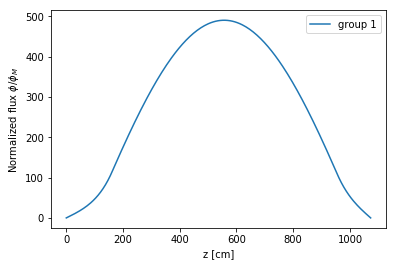

In [110]:
# Build system
N = 250
x = np.linspace(0, 160+793+120, num=N)
# print(x)

i = 0
while x[i] < 160:
    i += 1
Nb = i
while x[i] < 160 + 793:
    i += 1
Nc = i - Nb
Nt = N - Nc - Nb

h = x[1]-x[0]
h2 = h**2

# Diffusion matrix
D = 1./h2*diags([1, -2, 1], [-1, 0, 1], shape=(N, N)).toarray()
D[:Nb] *= bD
D[Nb:Nb+Nc] *= cD
D[Nb+Nc:Nb+Nc+Nt] *= tD

# Removal
SR = np.eye(N)
SR[:Nb, :Nb] *= -bsA
SR[Nb:Nb+Nc, Nb:Nb+Nc] *= -csA
SR[Nb+Nc:Nb+Nc+Nt, Nb+Nc:Nb+Nc+Nt] *= -tsA

# Fission
aux1 = np.eye(N)
F = np.zeros((N,N))
F[Nb:Nb+Nc, Nb:Nb+Nc] = cnsF * aux1[Nb:Nb+Nc, Nb:Nb+Nc]

# Apply BCs
LHS = D + SR
LHS[0] = np.zeros(N)
LHS[0, 0] = 1.0
LHS[N-1] = np.zeros(N)
LHS[N-1, N-1] = 1.0

F[0] = np.zeros(N)
F[N-1] = np.zeros(N)

k = 1.0
flux_old = np.ones(N)
RHS = -F @ flux_old

def converged(k_old, k):
    if abs((k - k_old)/k_old) <= 1e-10:
        return True
    else:
        return False

for i in range(1000):
    k_old = k
    flux_new = np.linalg.solve(LHS, RHS)
    kp = sum(F @ flux_new)/sum(F @ flux_old)
    k = k_old * kp
    RHS = -(1./k) * F @ flux_new
    flux_old = flux_new
    if converged(k_old, k) == True:
        break

print('i = ', i)
print('k = ', k)
flux = flux_old

plt.plot(x, flux, label='group 1')
plt.legend(loc='upper right')
plt.ylabel(r"Normalized flux $\phi/\phi_M$")
plt.xlabel("z [cm]")
# plt.savefig("1D-fuel-reflec-eig-FDM", dpi=300, bbox_inches="tight")
plt.savefig("1D-fuel-reflec-eig-FDM2", dpi=300, bbox_inches="tight")
plt.show()